![title](Premier-league1.jpg)

# Market Value of English Premier League Players, 2017/18 Season

### Aim
#### Build a model for estimating a player's market value. 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Set

In [32]:
df = pd.read_csv('epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [33]:
df=df.replace("Northern Ireland","United Kingdom")
df=df.replace("England","United Kingdom")
df=df.replace("Wales","United Kingdom")
df=df.replace("Scotland","United Kingdom")
df=df.replace("United Kingdom","United Kingdom of Great Britain and Northern Ireland")

## Data Set Features

```
name: Name of the player 
club: Club of the player
age : Age of the player
position : The usual position on the pitch
position_cat :
    1 for attackers
    2 for midfielders
    3 for defenders
    4 for goalkeepers
market_value : As on transfermrkt.com on July 20th, 2017
page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
fpl_value : Value in Fantasy Premier League as on July 20th, 2017
fpl_sel : % of FPL players who have selected that player in their team
fpl_points : FPL points accumulated over the previous season
region:
    1 for England
    2 for EU
    3 for Americas
    4 for Rest of World
nationality
new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
age_cat
club_id
big_club: Whether one of the Top 6 clubs
new_signing: Whether a new signing for 2017/18 (till 20th July)```

In [4]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null int64
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
region          460 non-null float64
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.3+ KB


In [35]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


# Exploratory Data Analysis 

### Distribution of Market Value

In [36]:
df['market_value'].describe()

count    461.000000
mean      11.012039
std       12.257403
min        0.050000
25%        3.000000
50%        7.000000
75%       15.000000
max       75.000000
Name: market_value, dtype: float64

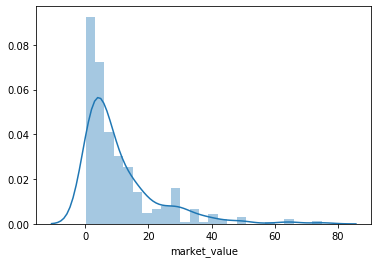

In [37]:
sns.distplot(df['market_value'])

Clearly not a normal distribution, but this was expected. Teams tend to have few elite players, and a large number of low + mid value players in their squads

### Average of Market Value in Every Club

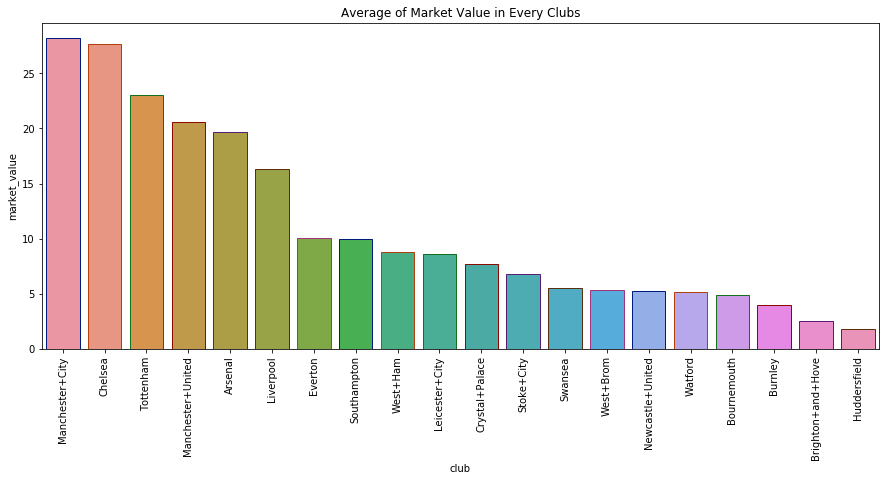

In [38]:
#club with their market value average
df_meanmv=pd.DataFrame(df.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=df_meanmv,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value in Every Clubs')
plt.show()

### Top 10 Players with Bigest Market Value 

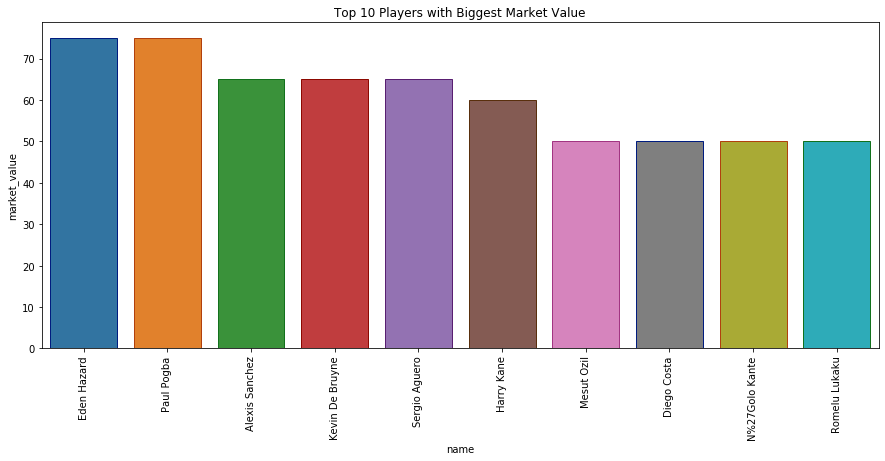

In [39]:
dfmarketv = df.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="market_value",  data=dfmarketv,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Top 10 Players with Biggest Market Value')
plt.show()

### Position with Average Market value

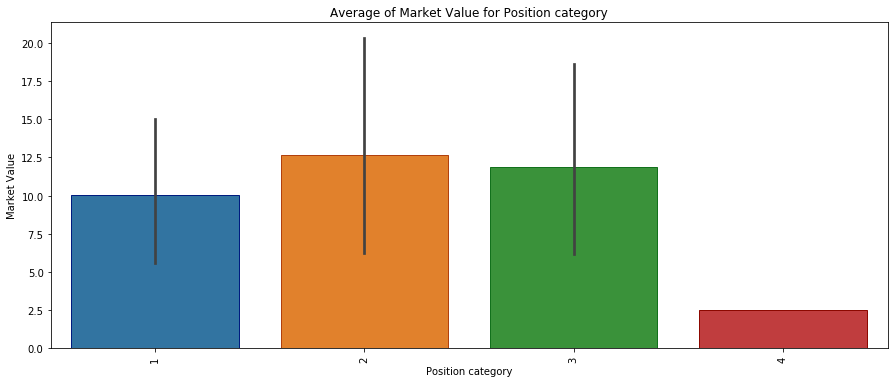

In [40]:
# position with their market value average
df_meanmv=pd.DataFrame(df.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x=df['position_cat'], y="market_value",data=df_meanmv,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Position category')
plt.ylabel('Market Value')
plt.title('Average of Market Value for Position category')
plt.show()

## Number of Premier League Player Position

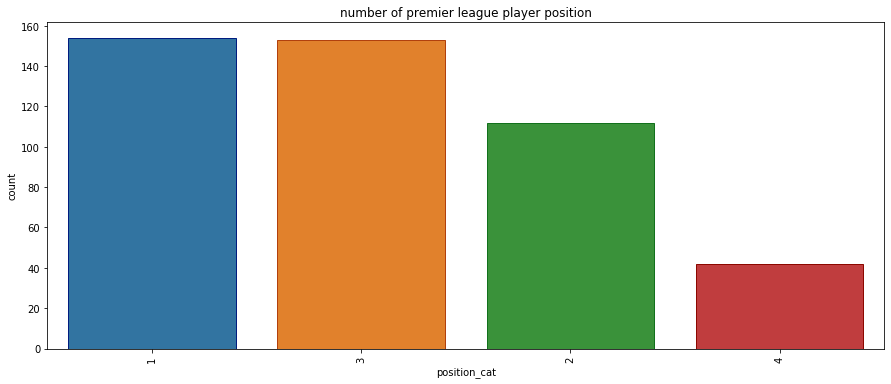

In [41]:
plt.subplots(figsize=(15,6))
sns.countplot('position_cat',data=df,edgecolor=sns.color_palette('dark',7),order=df['position_cat'].value_counts().index)
plt.xticks(rotation=90)
plt.title('number of premier league player position')
plt.show()

### Number of Player in Every Club and Position

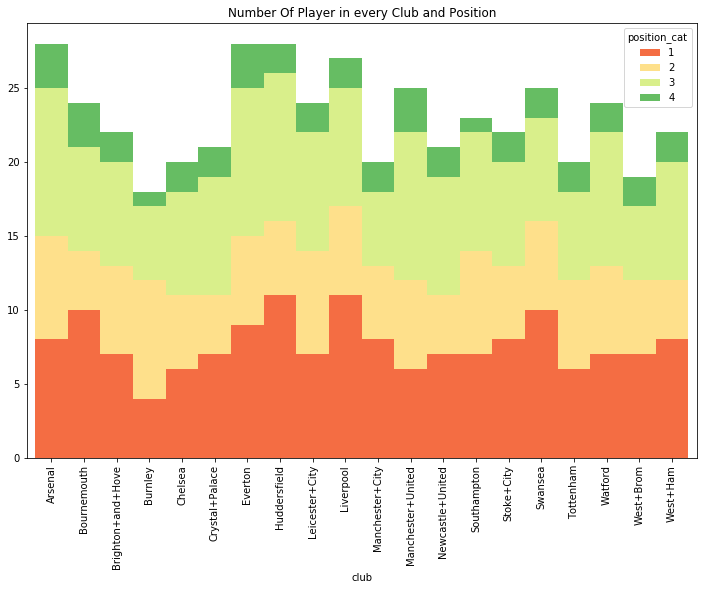

In [42]:
pd.crosstab(df.club,df.position_cat).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',4))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Number Of Player in every Club and Position')
plt.show()


Bar graph above shows how many players are there in every clubs and the variation of players position. The x axis represents the clubs name while y-axis represent the total number of players. the variation of player position are distinguish by different color in each bars. the colors code for players position is explained on the righ side of the chart.

It appears that Arsenal, Everton, and Huddersfield have the biggest number of players with 28 total number. Another point to check out is the lowest number of players. the club which has the lowes number of players is burnley, with only 18 players. willthis affected to the performance og the team?


### Distribution of Premier League Players Age

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:225: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


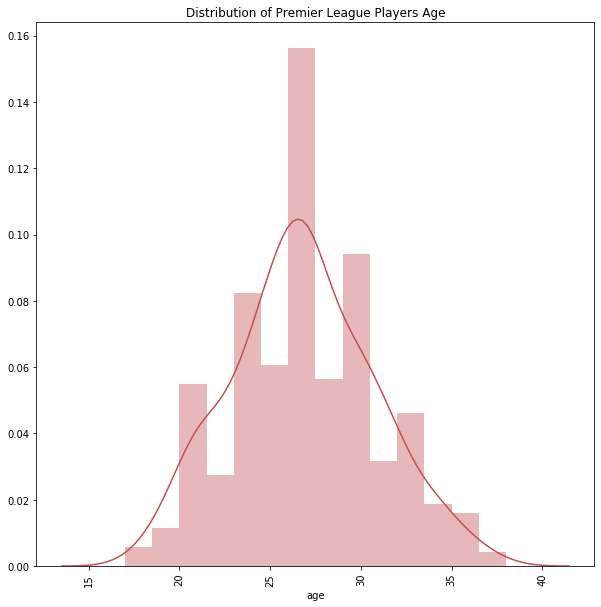

In [43]:
plt.subplots(figsize=(10,10))
sns.set_color_codes()
sns.distplot(df['age'], color = "R")
plt.xticks(rotation=90)
plt.title('Distribution of Premier League Players Age')
plt.show()

The typical of Histogram of Players age can be called Edge peak histogram. The edge peak distribution looks like the normal distribution except that it has a large peak at one tail. As it is shown in the histogram, the distribution of age is increased untill it meet the peak point at the age between 25-30. There is one bar that significanly higher than the others, that is why the histogram above can be calles Edge peak histogram.

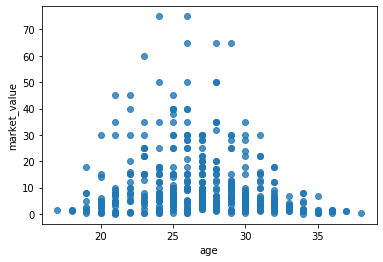

In [44]:
sns.regplot(data=df, x=df['age'], y=df['market_value'], fit_reg=False)

### Big Club Market Value Compare

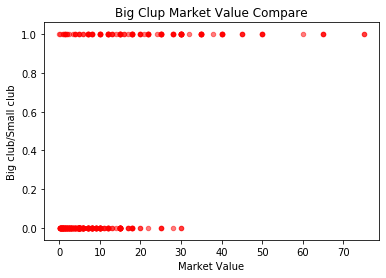

In [45]:
df.plot(kind="scatter",x="market_value",y="big_club",alpha=0.5,color="red")
plt.xlabel("Market Value")
plt.ylabel("Big club/Small club")
plt.title("Big Clup Market Value Compare")
plt.show()

### Feature Correlation

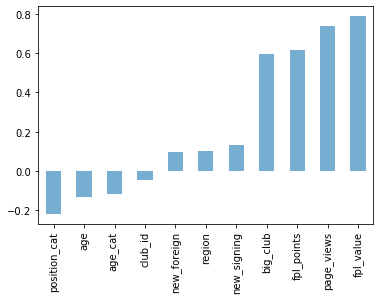

In [17]:
# Observe correlation to the diagnosis
tst = df.corr()['market_value'].copy()
tst = tst.drop('market_value')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [46]:
df = df.dropna()

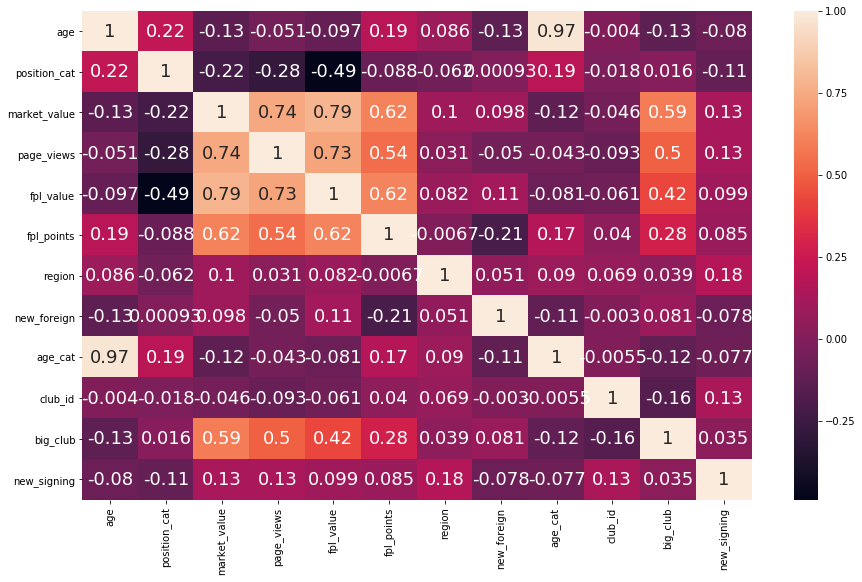

In [48]:
data = df.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(data,
            xticklabels=data.columns.values,
            yticklabels=data.columns.values, annot_kws={'size': 18}, annot=True)
plt.show()

In [49]:
#Now let's print features that have a good correlation with market value

cols = df.select_dtypes(np.number).columns
columns = []
for col in cols:
    columns.append(col)

#We are picking features that correlate with type greater than or equal to 0.1 or less than or equal to - 0.1
selected = []
for col in columns:
    if (df.market_value.corr(df[col]) >= 0.1)|( df.market_value.corr(df[col]) <= -0.1) : 
        selected.append(col)
        
print(selected)




['age', 'position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_points', 'region', 'age_cat', 'big_club', 'new_signing']


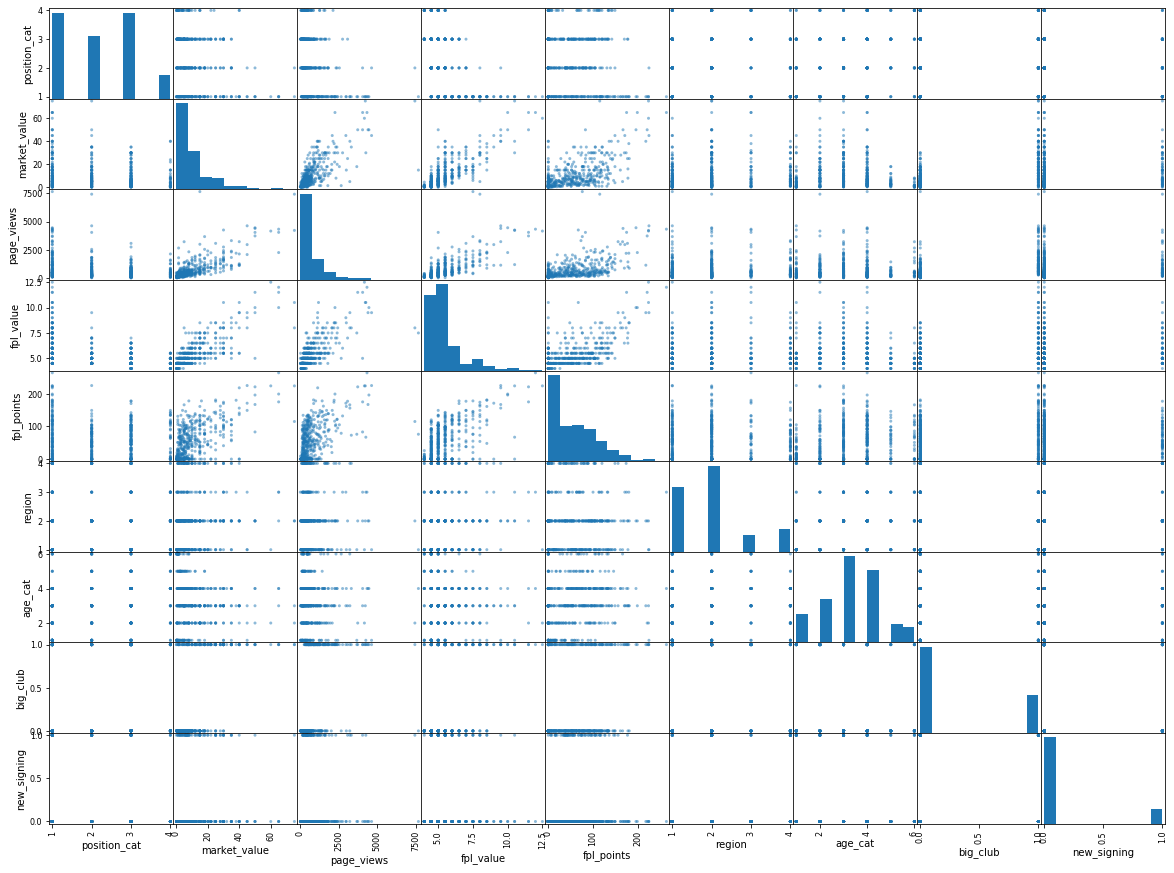

In [58]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[[ 'position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_points', 'region', 'age_cat', 'big_club', 'new_signing']],figsize=(20,15));

plt.show();



In [51]:

from sklearn.model_selection import train_test_split

#specify the data(features)
#X = wines.iloc[:,0:11] #select everything (:) from column 1 to 12 (0:11)
X = df[[ 'position_cat', 'page_views', 
                  'fpl_value', 'fpl_points', 'region', 'age_cat', 'big_club', 'new_signing']]
#specify the target
y = np.ravel(df.market_value)


#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check the shape of the train and validation data 
print('The size of the train features data is:',X_train.shape)
print('The size of the test features data is:',X_test.shape)
print('---------------------------------------')
print('The size of the train target data is:', y_train.shape)
print('The size of the test target data is:', y_test.shape)

The size of the train features data is: (308, 8)
The size of the test features data is: (152, 8)
---------------------------------------
The size of the train target data is: (308,)
The size of the test target data is: (152,)


In [53]:
#Normalize the features that do not seem to have a gaussian distribution 

#Take the log of fpl value and fpl points
X[['page_views','fpl_value']] = np.log(X[['page_views','fpl_value']] )

#Take the square root of fpl points

X['fpl_points'] = np.sqrt(X['fpl_points'])


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


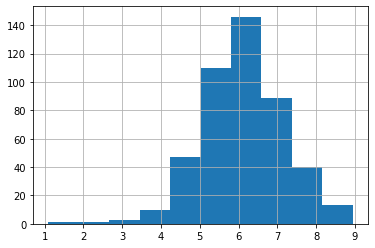

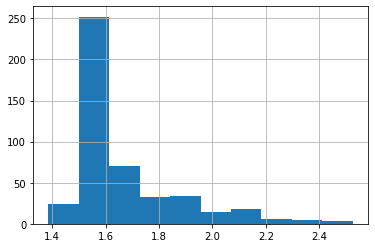

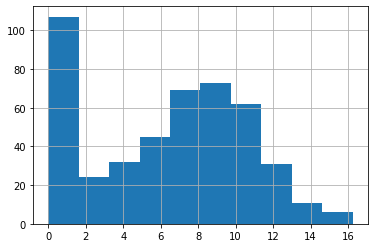

In [54]:
#Check to see that they have been normalized
X['page_views'].hist()
plt.show()
X['fpl_value'].hist()
plt.show()
X['fpl_points'].hist()
plt.show()

# MODEL SELECTION


There are a bunch of regression models to use to predict the market values of the football players. We will use 3 regression models.

In [55]:

from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.ensemble import RandomForestRegressor  #Random Forest 
from sklearn.ensemble import GradientBoostingRegressor  #Gradient Booster



#Most of the paramaters were chosen via RandomSearchCV

predictors = {
    "LinearRegression":{'model':LinearRegression(),'params':{}},
   
    "RandomForestRegeressor":{'model': RandomForestRegressor(),'params':
                              [
                                  {'n_estimators': [100,500],
                                   'min_samples_split': [2,5],
                                   'min_samples_leaf': [2],
                                   'max_depth': [8,None],
                                   'bootstrap': [False, True]}
                              ]},
    
    "GradientBoostingRegressor":{'model': GradientBoostingRegressor(),'params':
                                 [{'n_estimators': [800],
                                   'min_samples_split':[10],
                                   'min_samples_leaf': [4],
                                   'max_depth': [3],
                                   'learning_rate':[0.01]}
                                 ]},
    
}




In [56]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

num_predictors = len(predictors.keys()) #Number of models used


def batch_predict(X_train, y_train, X_test, y_test, verbose = True):
    prediction_results = pd.DataFrame(data = np.zeros(shape = (num_predictors, 4)),
                                     columns = ['model','train_score','test_score','training_time'])
    count = 0
    for key, model in predictors.items():
        starttime = time.clock()
        
        #GridSearchCV
        grid = GridSearchCV(model['model'],
                            model['params'],
                            refit = True,
                            cv = 10,
                            scoring = 'r2',
                            n_jobs = -1,
                           )
        estimator = grid.fit(X_train, y_train)
        endtime = time.clock()
        time_diff = endtime - starttime
        
        train_score = estimator.score(X_train,y_train)
        test_score = estimator.score(X_test,y_test)
        
        prediction_results.loc[count,'model' ] = key
        prediction_results.loc[count,'train_score'] = train_score
        prediction_results.loc[count,'test_score'] = test_score
        prediction_results.loc[count,'training_time'] = time_diff
        
        if verbose:
            print('trained {c} in {f:2f}s'.format(c = key, f =time_diff))
            
        count +=1
        
        
    return prediction_results 

In [57]:
prediction_results  = batch_predict(X_train, y_train, X_test, y_test)
display(prediction_results.sort_values(by='test_score', ascending=False))

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trained LinearRegression in 0.185436s


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


trained RandomForestRegeressor in 1.020448s
trained GradientBoostingRegressor in 0.359204s


,model,train_score,test_score,training_time
2,GradientBoostingRegressor,0.922877,0.767370,0.359204
1,RandomForestRegeressor,0.925952,0.736719,1.020448
0,LinearRegression,0.764213,0.727171,0.185436
